<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8F%89%EA%B0%80_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print('정확도: {0:.4f}'.format(accuracy))

정확도: 0.9121


* 정밀도

In [15]:
from sklearn.metrics import precision_score
precision = precision_score(y, y_pred)
print('정밀도: {0:.4f}'.format(precision))

정밀도: 0.9010


* 재현율

In [13]:
from sklearn.metrics import recall_score
recall = recall_score(y, y_pred)
print('재현율: {0:.4f}'.format(recall))

재현율: 0.8585


* F1 score

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [19]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.1).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

In [24]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion = confusion_matrix(y, y_pred2)
accuracy = accuracy_score(y, y_pred2)
precision = precision_score(y, y_pred2)
recall = recall_score(y, y_pred2)
f1 = f1_score(y, y_pred2)
print("혼동행렬:\n", confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

혼동행렬:
 [[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717, F1:0.8110


* ROC 곡선 시각화

In [29]:
from sklearn.metrics import roc_curve 
pred_proba_class1 = model_lor.predict_proba(X)[:, 1]
fprs, tprs, thresholds = roc_curve(y, pred_proba_class1)

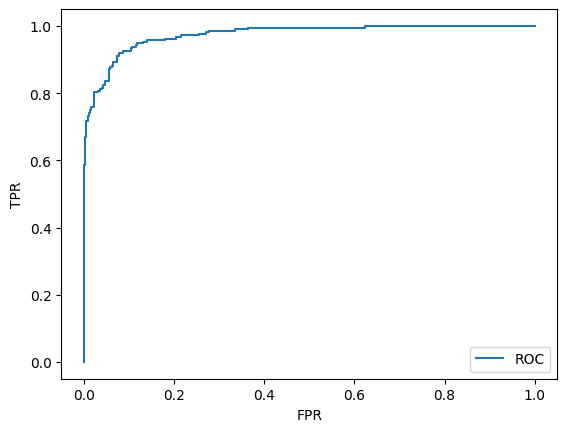

In [32]:
import matplotlib.pyplot as plt 
plt.plot(fprs, tprs, label='ROC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.legend()

* ROC AUC 값

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, pred_proba_class1) # 두번째 인자 조심
print('AUC: {0:.4f}'.format(roc_auc))

AUC: 0.9741
